### Coding Exercises

In [1]:
#imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Create a datafram, sales from a csv file all_sales
sales = pd.read_csv('supermarket_sales.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   float64
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
dtypes: float64(4), object(9)
memory usage: 102.4+ KB


In [4]:
sales.isnull().sum()

Invoice ID       7
Branch           7
City             7
Customer type    7
Gender           7
Product line     7
Unit price       7
Quantity         7
Tax 5%           7
Total            7
Date             7
Time             7
Payment          7
dtype: int64

In [5]:
#Displays the null values of the Data column
# isna() before dropna()
sales[sales['Invoice ID'].isna()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# isna() before dropna()
sales = sales.dropna()
sales.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
dtype: int64

In [7]:
sales.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01/05/2019,13:08,Ewallet


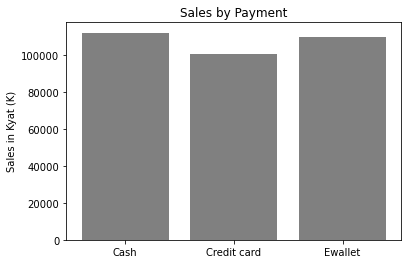

In [8]:
pcategories = ['Cash','Credit card','Ewallet']
plt.bar(pcategories, sales.groupby(['Payment']).sum()['Total'], color = 'grey')

plt.title('Sales by Payment')
plt.ylabel('Sales in Kyat (K)')
plt.show()

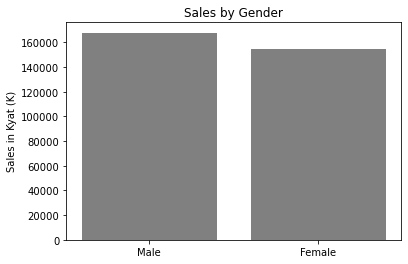

In [9]:
gender = ['Male','Female']
plt.bar(gender, sales.groupby(['Gender']).sum()['Total'], color = 'grey')

plt.title('Sales by Gender')
plt.ylabel('Sales in Kyat (K)')
plt.show()

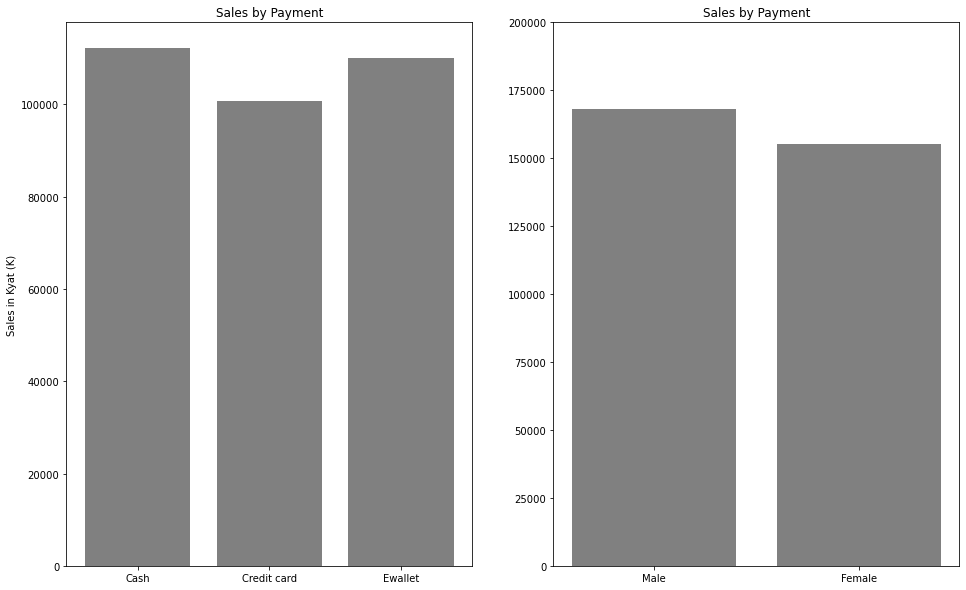

In [10]:
fig = plt.figure(figsize = (16,10))
#plot 1
plt.subplot(1,2,1)
pcategories = ['Cash','Credit card','Ewallet']
plt.bar(pcategories, sales.groupby(['Payment']).sum()['Total'], color = 'grey')

plt.title('Sales by Payment')
plt.ylabel('Sales in Kyat (K)')

#plot 2
plt.subplot(1,2,2)
gender = ['Male','Female']
plt.bar(gender, sales.groupby(['Gender']).sum()['Total'], color = 'grey')

plt.title('Sales by Payment')


plt.ylim(0,200000)
plt.show()

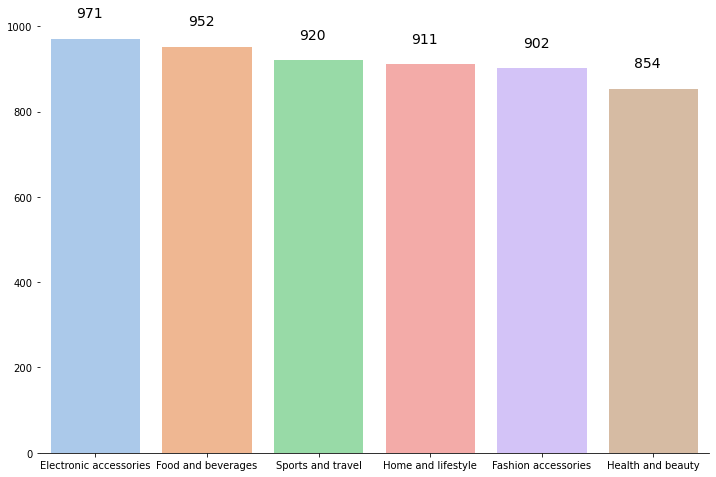

In [18]:
fig = plt.figure(figsize = (12,8))

product_line = sales.groupby('Product line')
quantity = product_line.sum()['Quantity']

sort_sum = quantity.sort_values(ascending=False)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum['Product line']
quantity = sort_sum['Quantity']

g = sns.barplot(x = product, y = quantity, palette = 'pastel')

for i in ['top', 'left', 'right']:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+50,
           round(i.get_height()),
           fontsize = 14)
    
plt.xlabel('')
plt.ylabel('')

plt.show()